# Random forest explain  -- supervisedd learning
# is parallel processig of multiple tress
# randomness because it take data randomly and show result and on basis of mean ,mode or median finally show final result................................................................
# 1. What is a random forest?
# A random forest is an ensemble learning method primarily used for classification and regression tasks in machine learning. It operates by constructing a multitude of decision trees during training and outputting the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees.

# Key Features of Random Forest:
Ensemble Method: Random forest combines the predictions of multiple decision trees to improve accuracy and control overfitting.

Bootstrap Aggregating (Bagging): It uses a technique called bagging, where multiple subsets of the training data are created through random sampling with replacement. Each decision tree is trained on a different subset.

Random Feature Selection: When splitting nodes in the trees, random forests select a random subset of features, which helps to ensure that the trees are diverse and reduces correlation among them.

Robustness: Random forests are less sensitive to noise and overfitting compared to individual decision trees, making them more robust for various datasets.

Feature Importance: Random forests can provide insights into the importance of different features in making predictions, which can be useful for feature selection.

Scalability: They can handle large datasets with high dimensionality and are capable of processing both numerical and categorical data.

Applications:
Random forests are widely used in various fields, including finance (for credit scoring), healthcare (for disease prediction), marketing (for customer segmentation), and many others due to their versatility and effectiveness.

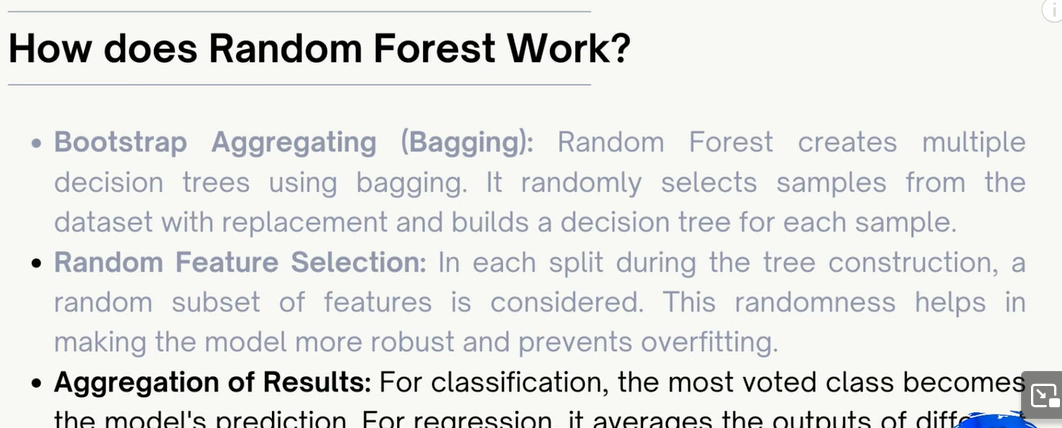
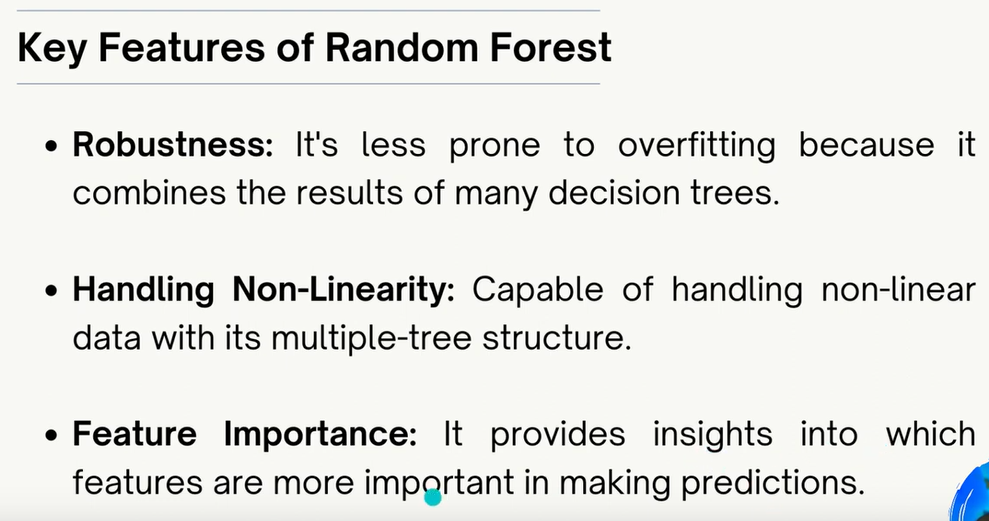
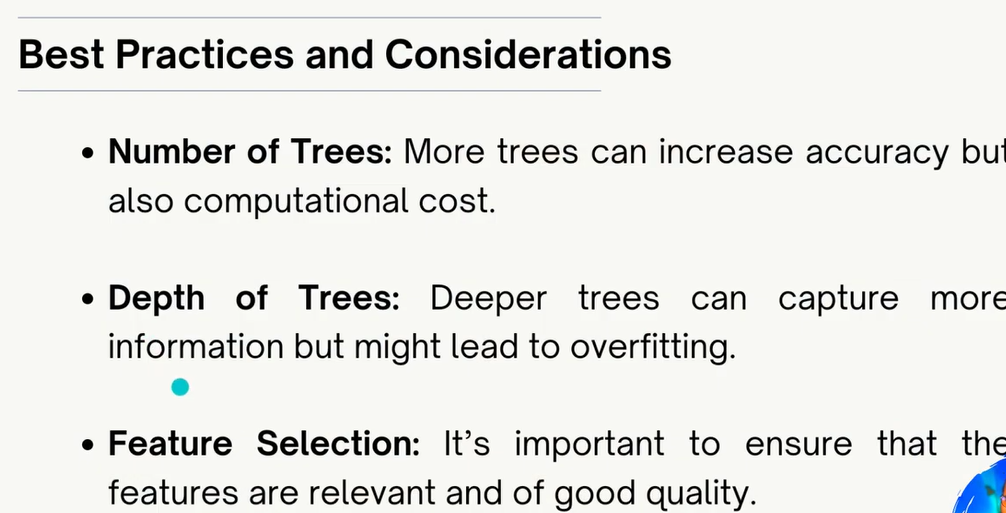

In [8]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# load the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [13]:
#split the data into x and y for classification
X=df.drop('sex',axis=1)
y=df['sex']

In [14]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
# create, train and predict the mode
model_cl = RandomForestClassifier(n_estimators=200, random_state=42)
model_cl.fit(X_train, y_train)
y_pred = model_cl.predict(X_test)

In [16]:
#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score:  0.6122448979591837
confusion matrix:
 [[ 7 12]
 [ 7 23]]
classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.66      0.77      0.71        30

    accuracy                           0.61        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.60      0.61      0.60        49



In [18]:
# USe random Forest for Regression task
X = df.drop('tip', axis = 1)
y = df['tip']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#create, train and predict the model
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

# evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

mean squared error:  1.4641
mean absolute error:  1.21
r2 score:  nan
root mean squared error:  1.21


c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\Owner\AppData\Local\Temp\ipykernel_14120\37698918.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


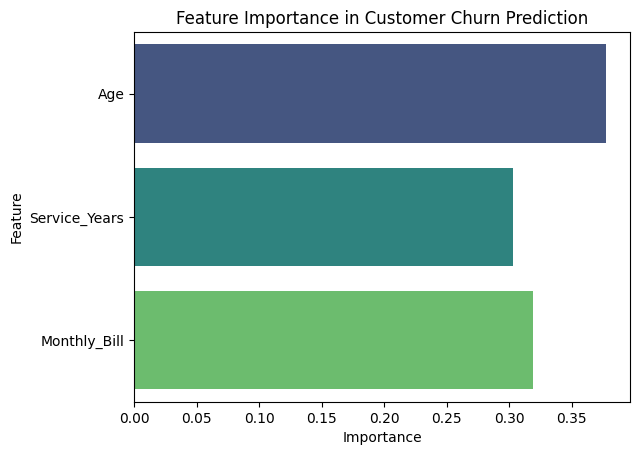

In [19]:
# example
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Example data: Simulating customer churn data
data = {
    'Age': [34, 23, 45, 36, 28, 54, 23, 36, 48, 40],
    'Service_Years': [2, 3, 8, 2, 5, 10, 1, 6, 9, 7],
    'Monthly_Bill': [50, 75, 100, 120, 60, 80, 40, 95, 110, 70],
    'Churn': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]  # 0 = No Churn, 1 = Churned
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Feature Importance
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Customer Churn Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [20]:
# Making Predictions on New Data

# Example new customers for prediction
new_customers = pd.DataFrame({
    'Age': [30, 60, 50],
    'Service_Years': [3, 12, 8],
    'Monthly_Bill': [80, 120, 90]
})

# Predict churn for new customers
new_predictions = rf.predict(new_customers)

# Display predicted churn for new customers
print("\nPredicted Churn for New Customers:")
for idx, pred in enumerate(new_predictions):
    print(f"Customer {idx+1}: {'Churn' if pred == 1 else 'No Churn'}")


Predicted Churn for New Customers:
Customer 1: Churn
Customer 2: No Churn
Customer 3: No Churn
